Fontes de cÃ³digo: ANADI TP6,TP7, TP9 PP "Exploratory Data Analysis" MINDD 23/24, trabalho MINDD do MEI Samuel Pereira e Rita Azevedo 23/24
## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree, export_text
from IPython.display import Image, display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
from keras_visualizer import visualizer
from keras import backend
import tensorflow as tf
%matplotlib inline
from sklearn import datasets, svm

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

### Leitura do dataset

In [2]:
df = pd.read_csv("Dados_Trabalho_TP2.csv")
#dar drop Ã¡ primeira coluna que apenas continha as linhas
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,Feminino,21.000000,1.620000,64.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal
1,Feminino,21.000000,1.520000,56.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,Masculino,23.000000,1.800000,77.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal
3,Masculino,27.000000,1.800000,87.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,Masculino,22.000000,1.780000,89.800000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,1.710730,131.408528,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_MÃ³rbida
2107,Feminino,21.982942,1.748584,133.742943,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_MÃ³rbida
2108,Feminino,22.524036,1.752206,133.689352,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_MÃ³rbida
2109,Feminino,24.361936,1.739450,133.346641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_MÃ³rbida


## Estudo do dataset
FCCAC - FrequÃªncia de Consumo de Comida Altamente CalÃ³rica
FCV - FrequÃªncia de Consumo de Vegetais
NRP - NÃºmero de RefeiÃ§Ãµes Principais
CCER - Consumo de Comida Entre RefeiÃ§Ãµes
CA - Consumo de Ãgua
CBA - Consumo de Bebidas AlcoÃ³licas
MCC - MonitorizaÃ§Ã£o do Consumo Calorias
HistÃ³rico de Obesidade Familiar

In [3]:
#Indica a dimensÃ£o do Dataframe
n_linhas,n_colunas=df.shape
print('Numero de linhas: {}  Numero de colunas: {}'.format(n_linhas, n_colunas))

Numero de linhas: 2111  Numero de colunas: 17


In [4]:
df.describe()

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
#ver os valores da coluna label
df['Label'].unique()

array(['Peso_Normal', 'Excesso_Peso_Grau_I', 'Excesso_Peso_Grau_II',
       'Obesidade_Moderada', 'Magreza_Grau_I', 'Obesidade_Severa',
       'Magreza_Grau_II', 'Magreza_Grau_III', 'Obesidade_MÃ³rbida'],
      dtype=object)

In [6]:
#ver os valores da coluna label
df['CCER'].unique()

array(['Ocasionalmente', 'Frequentemente', 'Sempre', 'NÃ£o'], dtype=object)

In [7]:
#ver os valores nulos
df[df.isnull().any(axis=1)].head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label


In [8]:
#Criar a coluna IMC
df['IMC']=df['Peso']/(df['Altura']*df['Altura'])



In [9]:
#Elimina-se as colunas respetivas para nÃ£o causar problemas no modelo
df=df.drop(columns=['Peso','Altura'])

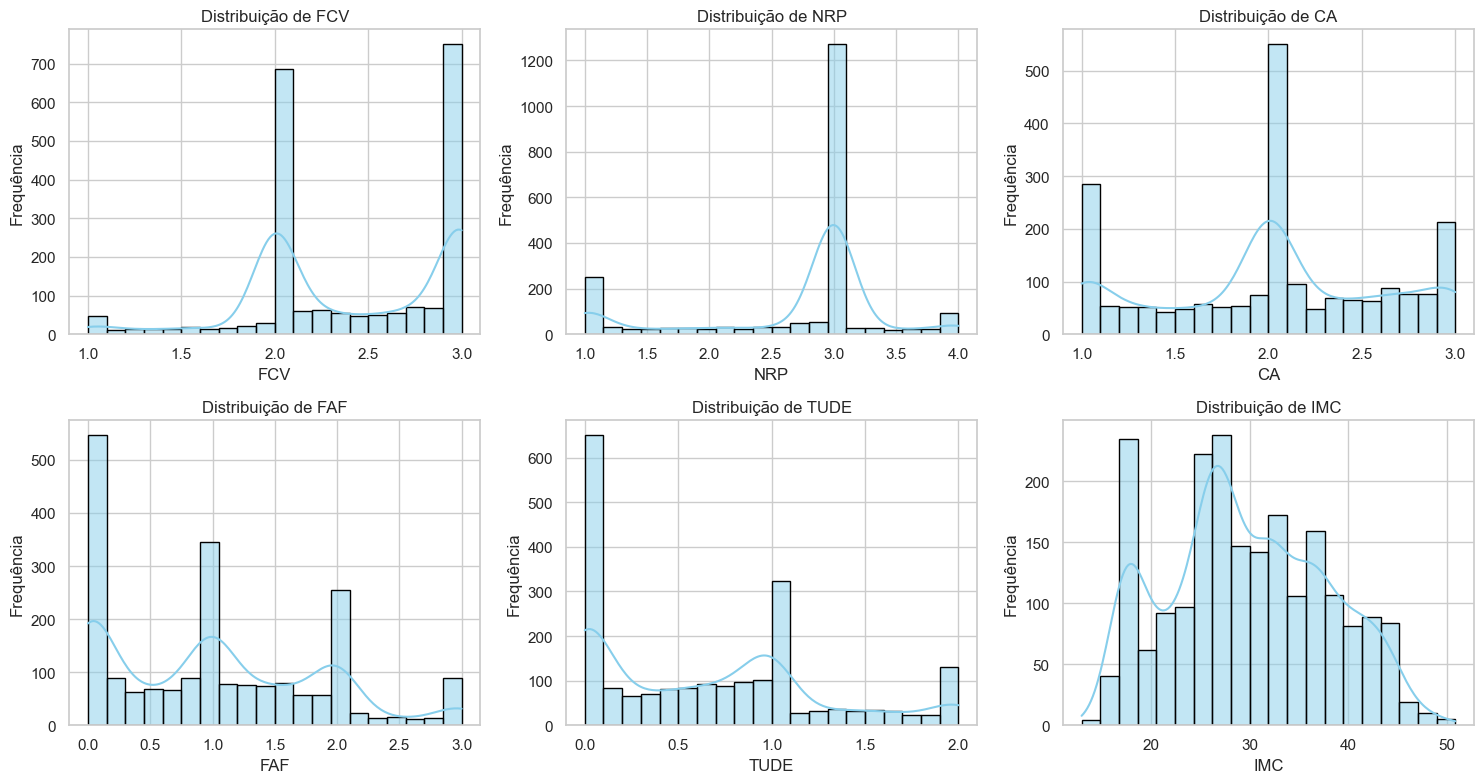

In [10]:
#FAZ SENTIDO TAMBEM TER DA IDADE E ALTURA?
sns.set(style="whitegrid")
columns_plot = ['FCV','NRP', 'CA', 'FAF', 'TUDE', 'IMC']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, column in enumerate(columns_plot):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], bins=20, kde=True, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'DistribuiÃ§Ã£o de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('FrequÃªncia') 
plt.tight_layout()
plt.show()

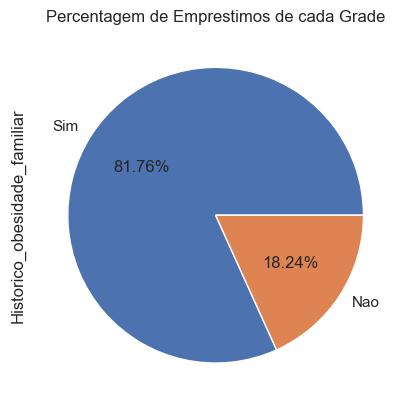

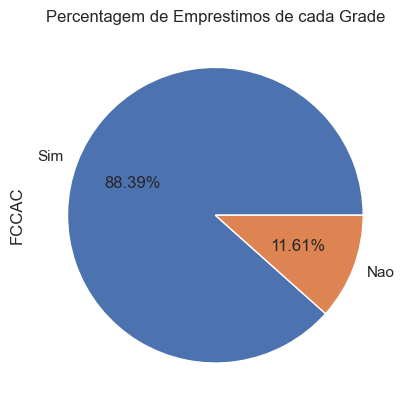

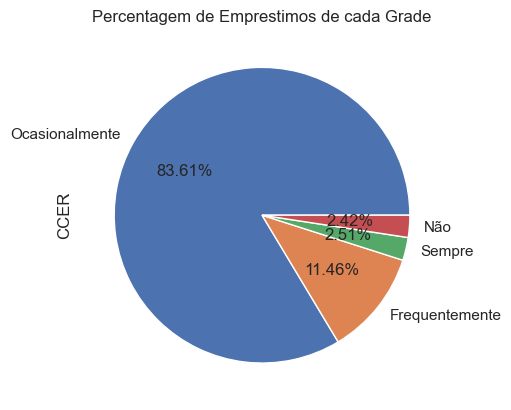

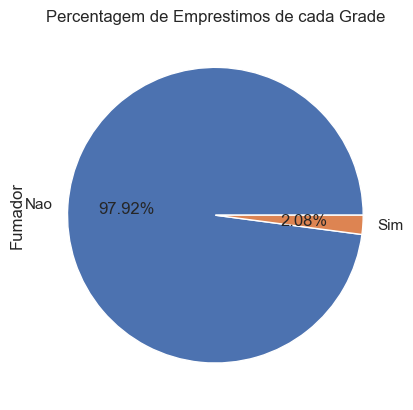

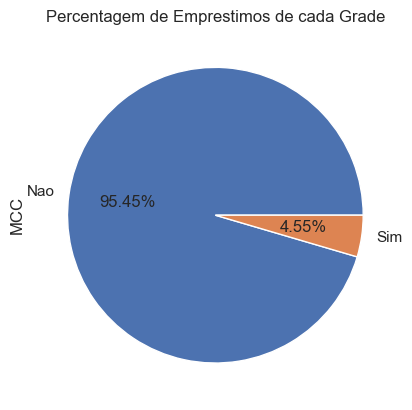

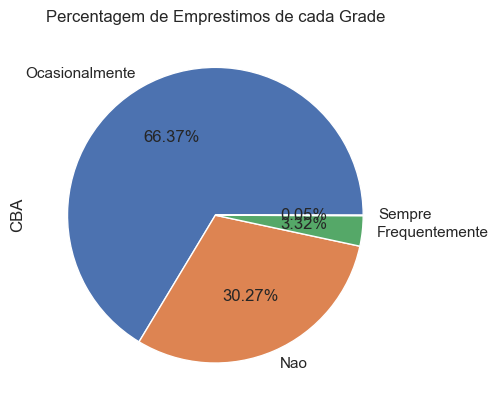

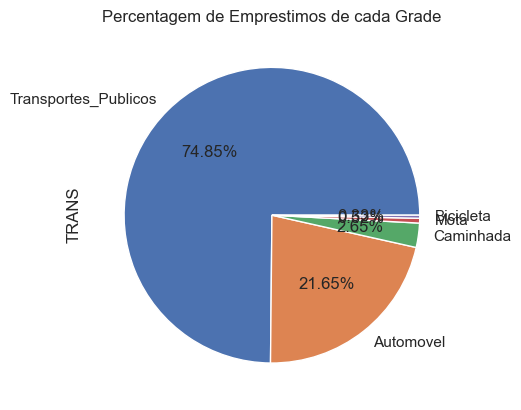

In [11]:
#AINDA VOU VER QUAIS SÃƒO UTEIS
df['Historico_obesidade_familiar'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['FCCAC'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['CCER'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['Fumador'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['MCC'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['CBA'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()
df['TRANS'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentagem de Emprestimos de cada Grade')
plt.show()


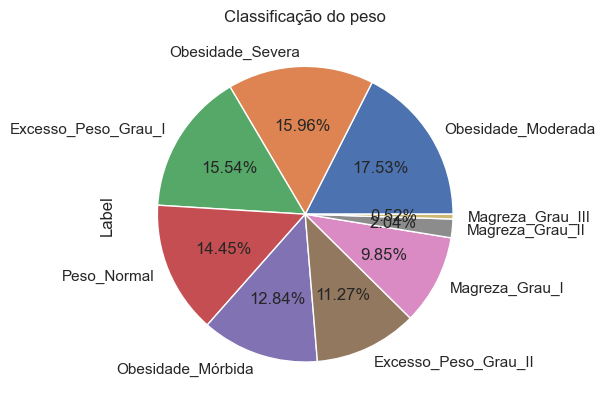

In [12]:
df['Label'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('ClassificaÃ§Ã£o do peso')
plt.show()

In [13]:
#AQUI QUE DADOS PODERIA USAR?!!!!!!!!!!!!!!!!!!!!!!!
#sns.set(style="whitegrid", color_codes=True)
#sns.lmplot(y='FCCAC', x='FCV', hue='Label', 
#           data=df, 
#           fit_reg=False, scatter_kws={'alpha':1})


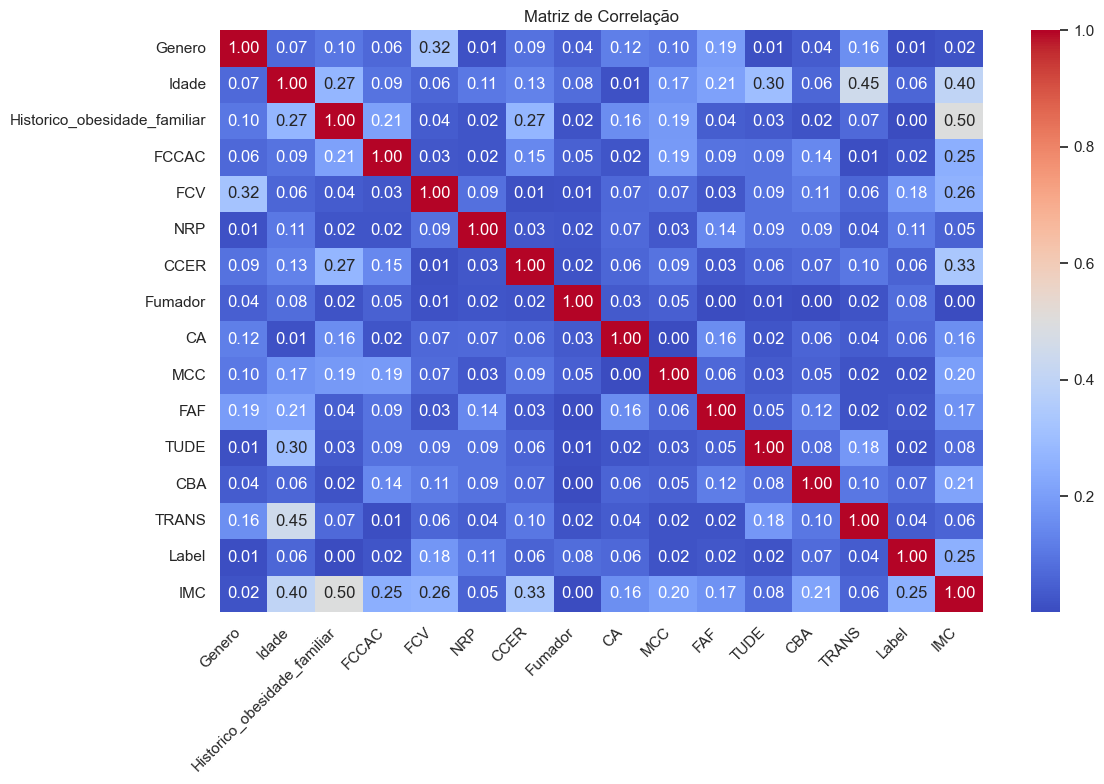

In [14]:
#TENHO DE REVER
#Usar labelencoder para dados transformar os dados qualitativos
df1 = df.copy()
label_encoder = LabelEncoder()
plt.figure(figsize=(12, 8))
for i in ['Genero','Historico_obesidade_familiar','FCCAC','CCER', 'Fumador', 'MCC', 'CBA','TRANS','Label']:
    df1[i] = label_encoder.fit_transform(df1[i].values)
sns.heatmap(df1.corr(method="spearman").abs(), cmap='coolwarm', annot=True, fmt='.2f', mask=False)
plt.xticks(ticks=[i + 0.5 for i in range(len(df1.columns))], labels=df1.columns, rotation=45, ha='right')
plt.yticks(ticks=[i + 0.5 for i in range(len(df1.columns))], labels=df1.columns)
plt.title('Matriz de CorrelaÃ§Ã£o')
plt.tight_layout()
plt.show()

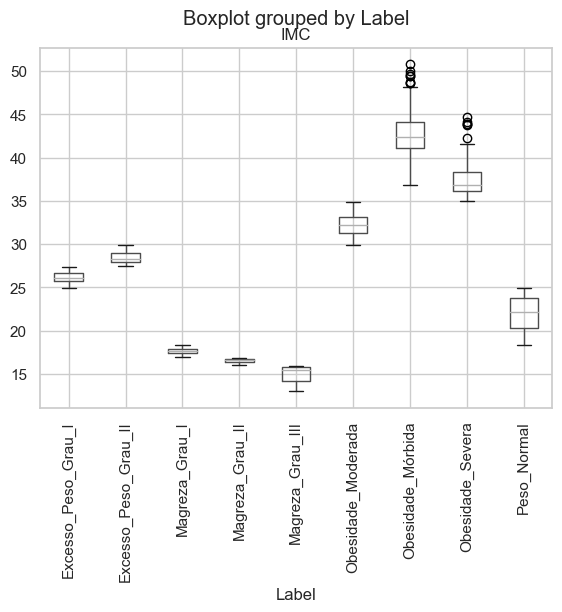

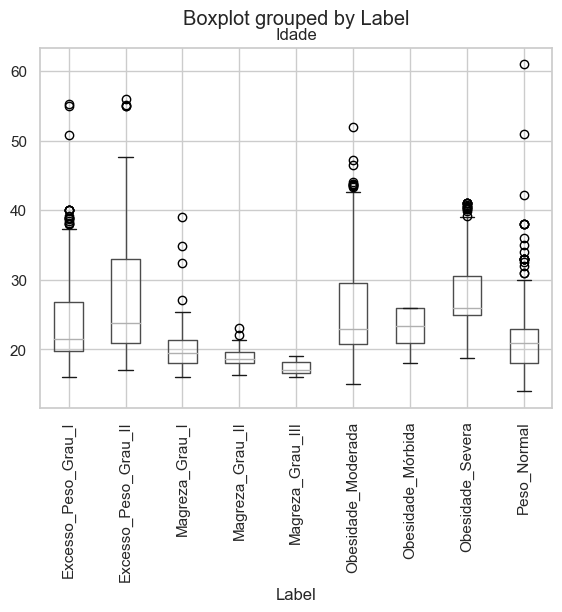

In [15]:
#visualizaÃ§Ã£o de outliers
for i in df.columns.difference(['FCV','NRP', 'CA', 'FAF', 'TUDE']):
    if (df[i].dtype != 'object'):
        df.boxplot(by="Label", column=[i], grid=False, return_type="dict")
        #Exportar imagens
        #plt.savefig(f"C:/Users/ritam/Documents/anadi\TP2\Imagens/ANADI/TP2/Imagens/Boxplot/Boxplot/{i.replace(' ', '_')}.png")
        plt.xticks(rotation=90)
        plt.grid(True)
plt.show()

## PreparaÃ§Ã£o dos dados
NOTA: O labelencoder foi usado na matriz de correlaÃ§Ã£o

In [16]:
label_encoder = LabelEncoder()
for i in ['Genero','Historico_obesidade_familiar','FCCAC','CCER', 'Fumador', 'MCC', 'CBA','TRANS']:
    df[i] = label_encoder.fit_transform(df[i].values)
df

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,Peso_Normal,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,Peso_Normal,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,Peso_Normal,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,Excesso_Peso_Grau_I,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,Obesidade_MÃ³rbida,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,Obesidade_MÃ³rbida,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,Obesidade_MÃ³rbida,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,Obesidade_MÃ³rbida,44.071535


In [17]:
#divide o dataset em target(y) e feature(x)
y = df.loc[:,"Label"].values
X = df.drop(["Label"],axis=1).values

#labelencoder no y
le = LabelEncoder()
y = le.fit_transform(y)

#divisÃ£o dos dados em treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape


((1688, 15), (423, 15))

# Ãrvore de decisÃ£o

In [18]:

#clf = DecisionTreeClassifier(random_state = 42)
#build the model with training sets
#clf.fit(X_train, y_train)

# com scale
# model = dt.fit(scaler.transform(X_train), y_train)
#---------------
# Ajuste do parÃ¢metro max_depth
max_depth = 5  # ou outro valor adequado escolhido com base nos grÃ¡ficos de overfitting
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Ajuste do parÃ¢metro min_samples_leaf
 overfitting
clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)

# Treinamento do modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

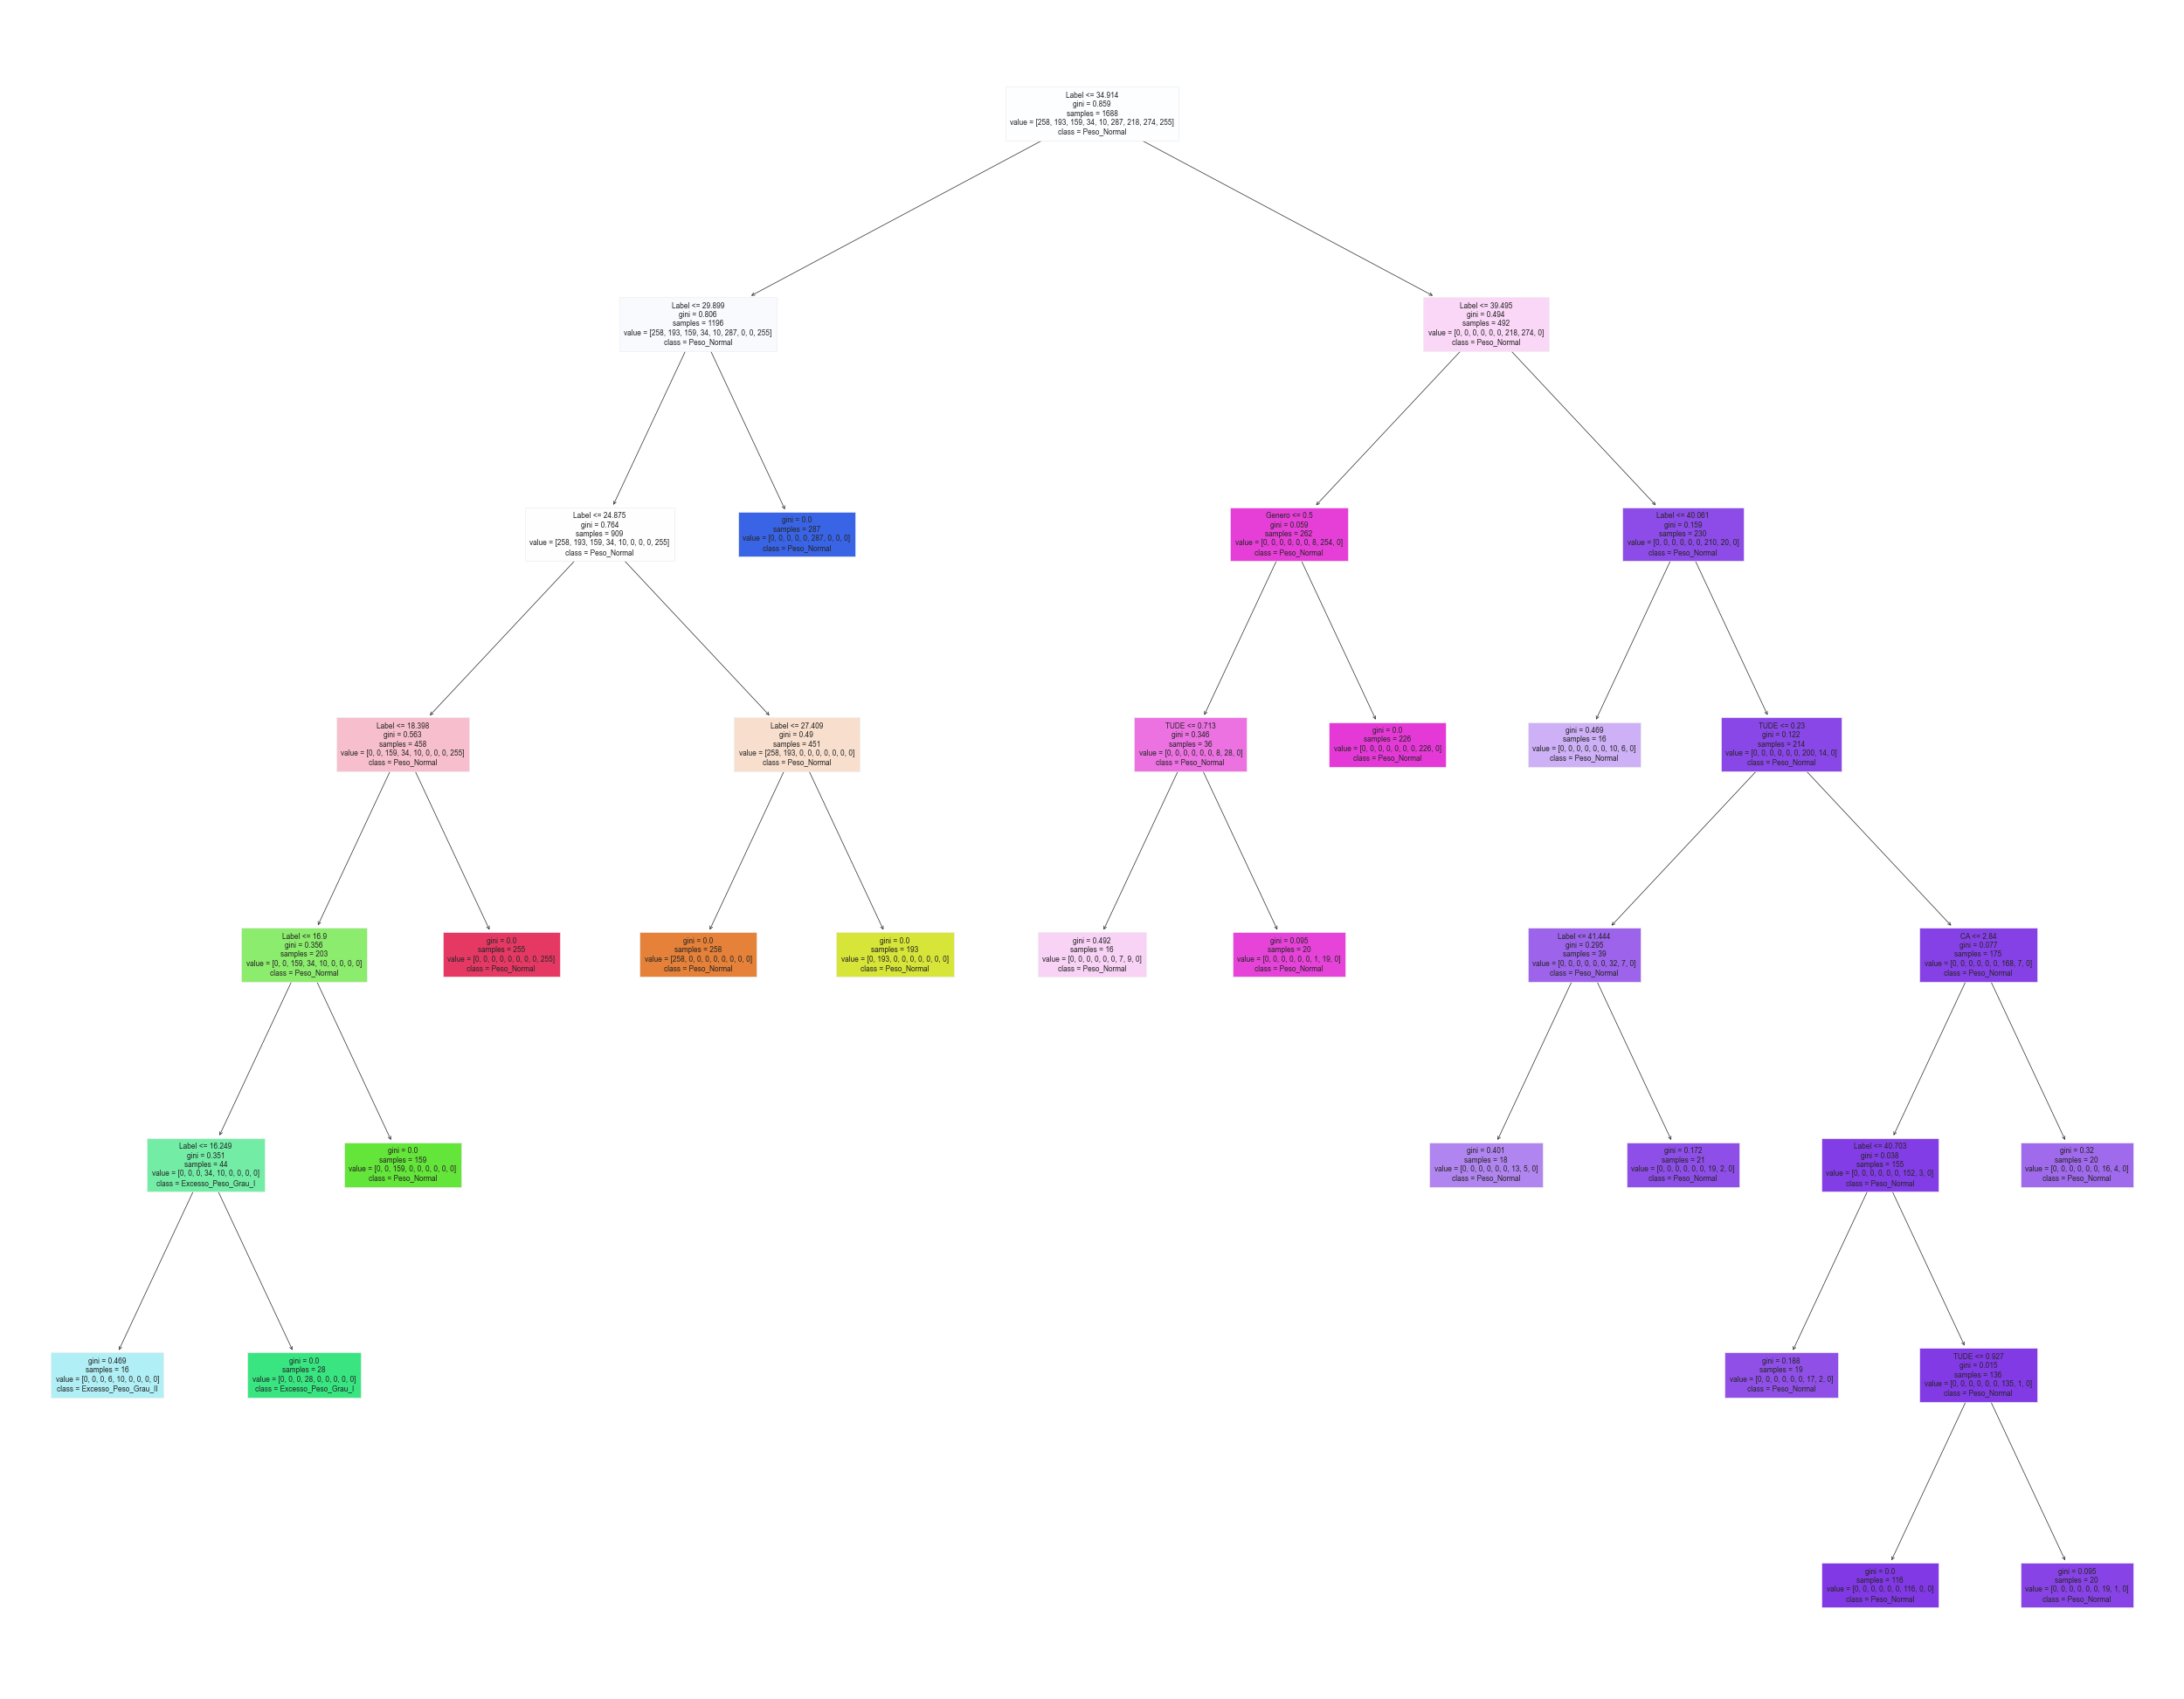

In [19]:
%matplotlib inline
plt.style.use('ggplot')


plt.figure(figsize=(32,25))  # set plot size (denoted in inches)
plot_tree(clf, 
          feature_names = list(df.columns),
          class_names = list(df['Label']),
          filled=True,                    
          fontsize=6);

In [20]:
#verificar a precisÃ£o dos dados de treino e teste
clf.score(X_train, y_train)

0.9798578199052133

In [21]:
#previsÃµes com decision tree
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

#avaliaÃ§Ã£o dos dados de treino e teste
tree_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", tree_train)
tree_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", tree_test)

Train Accuracy: 0.9798578199052133
Test Accuracy: 0.9692671394799054


In [22]:
#rate de erro da decision three
cmatrix = confusion_matrix(y_true = y_train, y_pred=clf.predict(X_train), labels=[True, False])
print("Confusion Matrix Training")
print(cmatrix)
#error rate dos dados de treino
error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)
print("---------------------------------")
ypred = clf.predict(X_test)
cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
print("Confusion Matrix Test")
print(cmatrix)
#error rate dos dados de teste
error_rate_test = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Test Error Rate:", error_rate_test)

Confusion Matrix Training
[[193   0]
 [  0 258]]
Training Error Rate: 0.0
---------------------------------
Confusion Matrix Test
[[45  0]
 [ 0 70]]
Test Error Rate: 0.0


Classification report Decision Tree: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        49
           3       1.00      0.78      0.88         9
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00        83
           6       0.89      0.92      0.91        53
           7       0.93      0.90      0.92        63
           8       1.00      0.98      0.99        50

    accuracy                           0.97       423
   macro avg       0.90      0.95      0.91       423
weighted avg       0.97      0.97      0.97       423



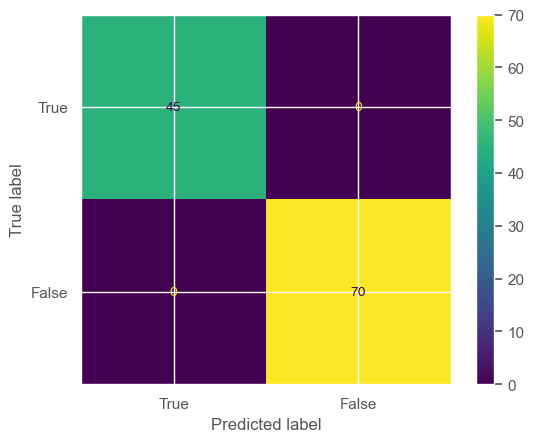

In [23]:
#matriz de confusÃ£o 
def matriz_confusao(actual, predicted):

    # outcome values order in sklearn
    matrix = confusion_matrix(y_true = actual, y_pred = predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()

    # classification report for precision, recall f1-score and accuracy
    # usei o parametro zero_division por causa do f1-score
    matrix = classification_report(actual,predicted, zero_division=0)
    print('Classification report Decision Tree: \n',matrix)

# chamada Ã  funÃ§Ã£o
res = matriz_confusao(y_test,ypred)

In [24]:
# K-Fold Cross Validation - implementation

# Splitting the Data into Folds
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 5
# Get the fold indices
fold_indices = kfold_indices(X, k)

In [25]:
model = DecisionTreeClassifier()

scores = []
prevs_folds=[]
y_folds=[]
# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)
    
    # Append the fold score to the list of scores
    scores.append(fold_score)


    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [0.9928909952606635, 0.8862559241706162, 0.995260663507109, 0.995260663507109, 0.8957345971563981]
Mean Accuracy: 0.9530805687203792
Standart Deviation: 0.05078835383741726


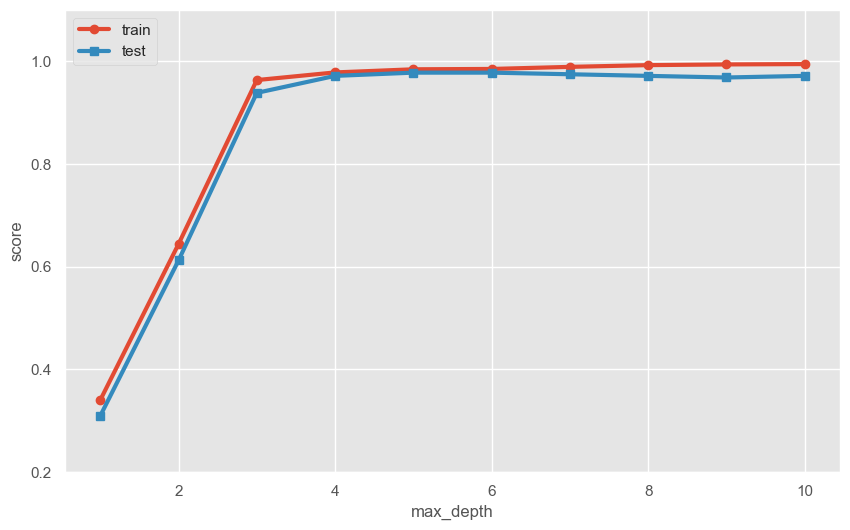

In [26]:
#reconstruir a arvore com diferentes valores
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
import numpy as np
max_depths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# For each of these values, we want to run the full model cascade from start to finish. 
# We also want to record the train and test scores. We do this in a for loop:
train_score = []
test_score = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.2, 1.1)
plt.legend();

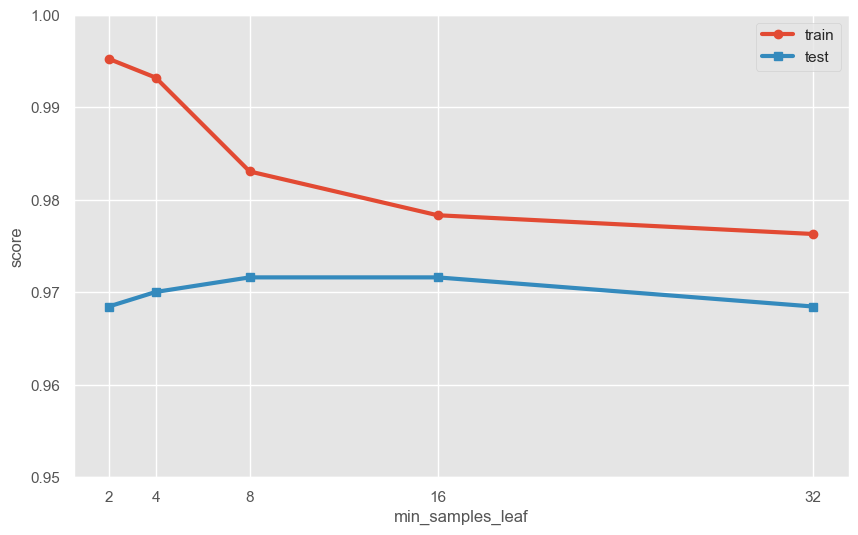

In [27]:
# What about the minimum numbers of samples required to make a node a leaf node? (another Hyperparameter)

train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    clf = DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.95, 1)
plt.xticks(min_samples)
plt.legend()

Antes de fazer-se o ajusto com overfitting foi obtido os seguintes valores usando o random state 42
Train Accuracy: 1.0
Test Accuracy: 0.9668769716088328

Confusion Matrix Training /t
[[171   0]
 [  0 227]]
Training Error Rate: 0.0

Confusion Matrix Test
[[ 67   0]
 [  0 101]]
Test Error Rate: 0.0


# Redes neuronais
Trata-se de um problema de classificaÃ§Ã£o como a variÃ¡vel "target" sÃ£o rotulos

In [28]:
#PRECISO DE FAZER ESTES 3 ABAIXO DE NOVO POR CAUSA DO ILOC?
#X = df.iloc[:, 2:].values
#y = df.iloc[:, 1].values

In [29]:
#labelencode = LabelEncoder()
#y = labelencode.fit_transform(y)


In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### PrÃ© processamento dos dados

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train.shape, X_test.shape

((1477, 15), (634, 15))

In [33]:
tf.random.set_seed(3)

In [34]:
#Escolhi usar softmax em vez de sigmoid como temos vÃ¡rias classes
model = keras.Sequential([
    #15 Ã© o nÂº de colunas
    tf.keras.Input(shape=(15,)),
    keras.layers.Dense(3, activation="relu"),
    #9 Ã© o nÂº de classes da coluna target, o softmax Ã© usado pk tem mais classes
    keras.layers.Dense(9, activation="softmax"),
])

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [36]:
print(model.summary())


Model: "sequential"

â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”“
â”ƒ Layer (type)                    â”ƒ Output Shape           â”ƒ       Param # â”ƒ
â”¡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”©
â”‚ dense (Dense)                   â”‚ (None, 3)              â”‚            48 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ dense_1 (Dense)                 â”‚ (None, 9)              â”‚            36 â”‚
â””â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”˜

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
#visualizer(model, file_format='jpeg', view=True, settings=None)

In [38]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 8ms/step - accuracy: 0.1031 - loss: 2.3884 - val_accuracy: 0.1892 - val_loss: 2.2497
Epoch 2/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 3ms/step - accuracy: 0.1533 - loss: 2.2909 - val_accuracy: 0.2162 - val_loss: 2.1801
Epoch 3/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 3ms/step - accuracy: 0.1681 - loss: 2.2194 - val_accuracy: 0.2230 - val_loss: 2.1312
Epoch 4/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 3ms/step - accuracy: 0.1794 - loss: 2.1663 - val_accuracy: 0.2500 - val_loss: 2.0944
Epoch 5/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 3ms/step - accuracy: 0.2153 - loss: 2.1261 - val_accuracy: 0.2500 - val_loss: 2.0634
Epoch 6/30
42/42 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 3ms/step - accuracy: 0.2626 - loss: 2.0920 - val_accuracy: 0.2635 - val_loss: 2.0374
Epoc

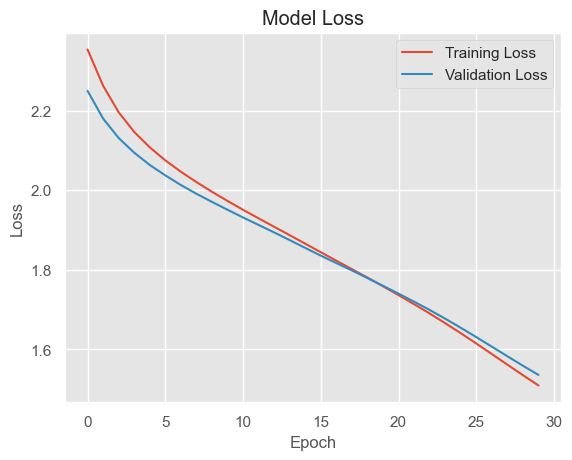

In [39]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()


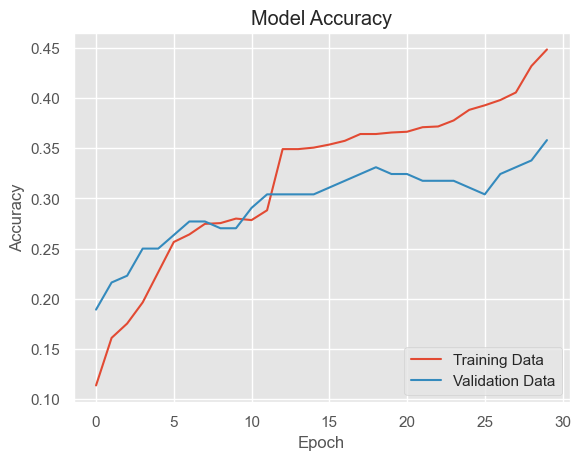

In [40]:
plt.plot(history.history["accuracy"], label="Training Data")
#adicionei esta linha debaixo
plt.plot(history.history["val_accuracy"], label="Validation Data")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.show()

In [41]:
#USEI CHATGPT
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Supondo que vocÃª jÃ¡ tenha treinado o modelo
# Fazendo previsÃµes no conjunto de teste
#y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculando a acurÃ¡cia
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.4f}')

# Calculando a sensibilidade (recall)
#sensitivity = recall_score(y_test, y_pred, average='macro')
#print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Calculando a especificidade
# A especificidade Ã© um pouco mais complexa, vamos calcular manualmente usando a matriz de confusÃ£o
#cm = confusion_matrix(y_test, y_pred)
#specificity = []
#for i in range(len(cm)):
#    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
#    fp = cm[:, i].sum() - cm[i, i]
#    specificity.append(tn / (tn + fp))
#specificity = np.mean(specificity)
#print(f'Specificity: {specificity:.4f}')

# Calculando o F1-Score
#f1 = f1_score(y_test, y_pred, average='macro')
#print(f'F1-Score: {f1:.4f}')

# RelatÃ³rio detalhado de classificaÃ§Ã£o
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))


In [42]:
# FunÃ§Ã£o para treinar e avaliar modelos TP2 MINDD
#def train_evaluate_model(model, name):

   # model.add(Dense(1))
    #model.compile(loss='mean_squared_error', optimizer='adam')

    #model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # PrevisÃµes
    #predictions = model.predict(X_test)

    #predictions = scaler.inverse_transform(predictions)

    #plt.plot(date_test, predictions, label=name)

    # AvaliaÃ§Ã£o do Modelo
    #mse = mean_squared_error(y_test, predictions)

    #print(f'{name} - MSE: {mse:.2f}')
    #print(f'{name} - RMSE: {sqrt(mse):.2f}')

    #print('-' * 50)
    


### SVM


In [43]:
#plt.close();
#sns.set_style("whitegrid");
#sns.pairplot(df, hue="obesity",size=30);
#plt.show();

In [44]:
df_svm=df.copy()

In [45]:
n_sample= len(X)
n_sample

2111

In [46]:
#X2=X[order]
#y2=y[order].astype(int)
#X_train2=X2[: int(0.9*n_sample)]
#y_train2=y2[: int(0.9*n_sample)]
#X_test2=X2[int(0.9*n_sample):]
#X_test2=X2[int(0.9*n_sample):]

ValueError: X has 2 features, but SVC is expecting 15 features as input.

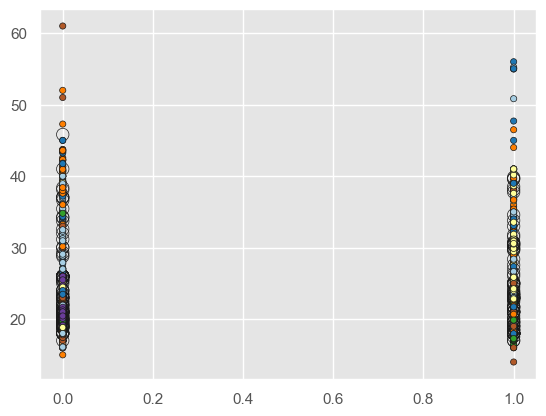

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Suponho que X e y jÃ¡ estÃ£o definidos e tÃªm 15 features
# Vou corrigir o cÃ³digo sem mudar a quantidade de features

np.random.seed(0)
order = np.random.permutation(n_sample)
X2= X[order]
y2= y[order].astype(float)

# Divida os dados em conjuntos de treinamento e teste
X_train2 = X2[:int(0.9 * n_sample)]
y_train2 = y2[:int(0.9 * n_sample)]
X_test2 = X2[int(0.9 * n_sample):]
y_test2 = y2[int(0.9 * n_sample):]

for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train2, y_train2)
    
    plt.figure()
    plt.clf() 
    
    # Scatter plot dos dados de treino
    plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20)
    
    # CÃ­rculo em volta dos dados de teste
    plt.scatter(X_test2[:, 0], X_test2[:, 1], facecolors="none", edgecolor="k", s=80)
    
    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-0.5, 0, 0.5])
    
    plt.title(kernel)
    plt.show()



In [ ]:
#Parameter tunning
import sklearn.model_selection as skm
from sklearn import svm
from sklearn.datasets import make_classification
kfold = skm.KFold(5, random_state=0, shuffle=True)

# Definir a grade de parÃ¢metros para busca
grid = skm.GridSearchCV(svm.SVC(kernel='linear', gamma=10), {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}, refit=True, cv=kfold, scoring='accuracy')

# Ajustar o modelo aos dados
grid.fit(X, y)

# Exibir os melhores parÃ¢metros
print("Melhores parÃ¢metros:", grid.best_params_)
